<a href="https://colab.research.google.com/github/pakpatel/pedestrian-recognition-CNN/blob/main/AI_Project_Training_Test_Version_Beta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import logging
import numpy as np
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print("Setting data path")
data_path = "/content/drive/My Drive/AI Project Training Test Version - I/data"
train_images_path = os.path.sep.join([data_path, "train_images"])
test_images_path = os.path.sep.join([data_path, "test_images"])
train_labels_path = os.path.sep.join([data_path, "train_labels.csv"])
test_labels_path = os.path.sep.join([data_path, "test_labels.csv"])

print("Setting constants")
reshape_size = 224

Setting data path
Setting constants


In [ ]:
output_path = "/content/drive/My Drive/AI Project Training Test Version - I/output"
model_path = os.path.sep.join([output_path, "model.h5"])
plot_path = os.path.sep.join([output_path, "plot.png"])

In [ ]:
print("Loading in lables for training data")
train_labels = open(train_labels_path).read().strip().split("\n")
train_labels = train_labels[1:]

print("Initializing data structures for storing raw data")
train_images = []
train_targets = []
train_filenames = []

Loading in lables for training data
Initializing data structures for storing raw data


In [ ]:
print("Loading images and their corresponding target output")
for row in train_labels:
  # convert row to list
  row = row.split(",")

  # extract filename
  filename = row[0]

  # print("Begining preprocessing of image {}".format(filename))

  # convert dimensions to float
  width, height = float(row[1]), float(row[2]) 
  xmin, ymin = float(row[4]), float(row[5])
  xmax, ymax = float(row[6]), float(row[7])

  # scale dimensions
  xmin = xmin / width
  xmax = xmax / width
  ymin = ymin / height
  ymax = ymax / height

  # print("Reading image {}".format(filename))
  image_file_path = os.path.sep.join([train_images_path, filename])
  
  # print("Reshaping and converting {} to numpy array".format(filename))
  # reshape image using tf tools
  image = tf.keras.preprocessing.image.load_img(image_file_path, target_size=(reshape_size, reshape_size))

  # convert reshaped image to tf image array type - numpy array
  image = tf.keras.preprocessing.image.img_to_array(image)

  # print("Storing converted image {} to train images list".format(filename))
  # store converted image
  train_images.append(image)

  # print("Storing expected bounding box of {} to train targets list".format(filename))
  # store target bounding box
  train_targets.append((xmin, ymin, xmax, ymax))

  # print("Storing image {} file name to train filename list".format(filename), end="\n\n")
  # store filename of the image
  train_filenames.append(filename)


print("Finished loading raw data and labels")

Loading images and their corresponding target output
Finished loading raw data and labels


In [ ]:
print("Loading in lables for testing")
test_labels = open(test_labels_path).read().strip().split("\n")
test_labels = test_labels[1:]

print("Initializing data structures for storing raw data")
test_images = []
test_targets = []
test_filenames = []

Loading in lables for testing
Initializing data structures for storing raw data


In [ ]:
print("Loading images and their corresponding target output")
for row in test_labels:
  # convert row to list
  row = row.split(",")

  # extract filename
  filename = row[0]

  # print("Begining preprocessing of image {}".format(filename))

  # convert dimensions to float
  width, height = float(row[1]), float(row[2]) 
  xmin, ymin = float(row[4]), float(row[5])
  xmax, ymax = float(row[6]), float(row[7])

  # scale dimensions
  xmin = xmin / width
  xmax = xmax / width
  ymin = ymin / height
  ymax = ymax / height

  # print("Reading image {}".format(filename))
  image_file_path = os.path.sep.join([test_images_path, filename])
  
  # print("Reshaping and converting {} to numpy array".format(filename))
  # reshape image using tf tools
  image = tf.keras.preprocessing.image.load_img(image_file_path, target_size=(reshape_size, reshape_size))

  # convert reshaped image to tf image array type - numpy array
  image = tf.keras.preprocessing.image.img_to_array(image)

  # print("Storing converted image {} to train images list".format(filename))
  # store converted image
  test_images.append(image)

  # print("Storing expected bounding box of {} to train targets list".format(filename))
  # store target bounding box
  test_targets.append([xmin, ymin, xmax, ymax])

  # print("Storing image {} file name to train filename list".format(filename), end="\n\n")
  # store filename of the image
  test_filenames.append(filename)


print("Finished loading test raw data and labels")

Loading images and their corresponding target output
Finished loading test raw data and labels


In [ ]:
print("Converting train images to gray scale")
train_images = np.array(train_images, dtype="float32") / 255.0

print("Converting corresponding train targets to numpy array")
train_targets = np.array(train_targets, dtype="float32")

print("Converting test images to gray scale")
test_images = np.array(test_images, dtype="float32") / 255.0

print("Converting corresponding test targets to gray scale")
test_targets = np.array(test_targets, dtype="float32")

Converting train images to gray scale
Converting corresponding train targets to numpy array
Converting test images to gray scale
Converting corresponding test targets to gray scale


In [ ]:
# Create a convolutional neural network
model = tf.keras.models.Sequential([

    # Initial Convolution Stage
    tf.keras.layers.Conv2D(input_shape=(224,224,3), filters=3, kernel_size=(3,3), padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(0.2),

    # Convolution layer 1 - input shape will be determined from previous output
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding="same", activation="relu"),
    
    
    # Apply max pooling on previous layer
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),

    # Convolution layer 2
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding="same", activation="relu"),
    #tf.keras.layers.Dropout(0.5),
    
    # Convolution layer 2
    #tf.keras.layers.Conv2D(filters=8, kernel_size=(3,3), padding="same", activation="relu"),

    # Apply max pooling on previous layers
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),

    # flatten layers
    tf.keras.layers.Flatten(),

    # add a Dense layer
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.5),

    # add dense layer with half units are previous
    tf.keras.layers.Dense(64, activation="relu"),
    

    # keep adding dense layers until 4 units
    tf.keras.layers.Dense(16, activation="relu"),
    

    # final layer with 4 units - corresponds to each coordinate box
    tf.keras.layers.Dense(4, activation="sigmoid")


    ])


In [ ]:
print("Compiliing model")
opt = tf.keras.optimizers.Adam(learning_rate=0.002)
model.compile(optimizer=opt, loss="mse", metrics=["accuracy"])

Compiliing model


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 3)       84        
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 16)      2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0

In [ ]:
print("Training Model")
history = model.fit(
    train_images, train_targets, validation_data=(test_images, test_targets), batch_size=32, verbose=1, epochs=50 
)

Training Model
Epoch 1/50
10/10 [==============================] - 18s 2s/step - loss: 0.1261 - accuracy: 0.4870 - val_loss: 0.0790 - val_accuracy: 0.8421
Epoch 2/50
10/10 [==============================] - 17s 2s/step - loss: 0.0943 - accuracy: 0.7630 - val_loss: 0.0840 - val_accuracy: 0.8421
Epoch 3/50
10/10 [==============================] - 17s 2s/step - loss: 0.0458 - accuracy: 0.8499 - val_loss: 0.0754 - val_accuracy: 0.8421
Epoch 4/50
10/10 [==============================] - 17s 2s/step - loss: 0.0429 - accuracy: 0.8665 - val_loss: 0.0627 - val_accuracy: 0.8421
Epoch 5/50
10/10 [==============================] - 16s 2s/step - loss: 0.0341 - accuracy: 0.8629 - val_loss: 0.0559 - val_accuracy: 0.8421
Epoch 6/50
10/10 [==============================] - 16s 2s/step - loss: 0.0327 - accuracy: 0.8704 - val_loss: 0.0589 - val_accuracy: 0.8421
Epoch 7/50
10/10 [==============================] - 16s 2s/step - loss: 0.0331 - accuracy: 0.8591 - val_loss: 0.0502 - val_accuracy: 0.8421
Epoch

In [ ]:
model.save(model_path, save_format="h5")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


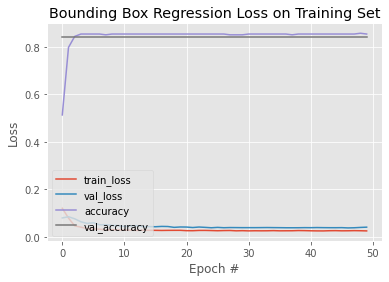

In [ ]:
import matplotlib.pyplot as plt
print(history.history.keys())
n = 50
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, n), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, n), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,n), history.history["accuracy"], label="accuracy")
plt.plot(np.arange(0,n), history.history["val_accuracy"], label="val_accuracy")
plt.title("Bounding Box Regression Loss on Training Set")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.savefig(plot_path)

In [ ]:
print(str(model_path))

/content/drive/My Drive/AI Project Training Test Version - I/output/model.h5


In [ ]:
trained_model = tf.keras.models.load_model(model_path)

In [ ]:
test_image = "/content/drive/My Drive/AI Project Training Test Version - I/img_7.png"

In [ ]:
img = tf.keras.preprocessing.image.load_img(test_image, target_size=(224,224))
img = tf.keras.preprocessing.image.img_to_array(img) / 255.0
img = np.expand_dims(img, axis=0)

In [ ]:
print(trained_model.predict(img))
prediction = trained_model.predict(img)[0]
(xmin,ymin,xmax,ymax) = prediction

[[0.62516624 0.19348174 0.91083163 0.9742367 ]]


In [ ]:

import cv2
import imutils
from google.colab.patches import cv2_imshow

In [ ]:
image = cv2.imread(test_image)
(h,w) = image.shape[:2]
print(h,w)
xmin = int(xmin*w)
ymin = int(ymin*h)
xmax = int(xmax*w)
ymax = int(ymax*h)
print(xmin,ymin,xmax,ymax)

417 555
346 80 505 406


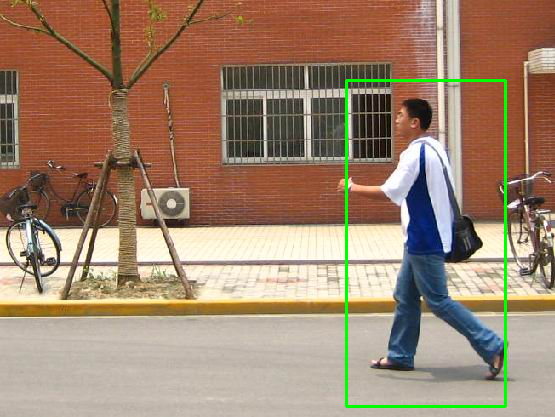

In [ ]:
cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0,255,0),2)
cv2_imshow(image)